In [1]:
using Distributions
using LinearAlgebra
using Plots

In [2]:
function Hess1(A, m)
    H = copy(A);
    i = 1;
    
    while (i < m - 1)
        u = H[:, i];
        u[1 : i] *= 0.0;
        u[i + 1] -= norm(u);
        u = normalize(u);
        Q = I - 2.0 * kron(u, u');
        H = Q * H * Q';
        i += 1;
    end
    
    display(eigvals(A));
    display(eigvals(H));
    display(H);
    display(norm(eigvals(H)-eigvals(A)))
    
    return H;
end

Hess1 (generic function with 1 method)

In [3]:
function BulgeInit(A,m)
   #Makes Hess and collects eigenvalues
    H = Hess1(A, m);
    Ls = eigvals(H);

    # Shift vector
    mus = [1.2, 3.4, 5.6, 2.1];
    p = length(mus);

    # Buids initial Q
    v = zeros(m);
    v[1] = 1.0;

    for i in 1:p
       v = (H - mus[i] * I) * v; 
    end

    u = v;
    u[1] -= norm(u);
    u = normalize(u);
    Q = I - 2.0 * kron(u, u');

    # Builds initial bulge
    B = Q * H * Q';
    display(norm(normalize(v) - normalize(Q[:, 1])))
    
    return (H,B,p)
end

BulgeInit (generic function with 1 method)

In [4]:
function BulgeChase(H,B,p,m)
    # Chase the bulge

    for i in 1:(m + 3 - 2 * p)
        u = B[:, i];
        u[1 : i] *= 0;
        u[i + 1] -= norm(u);
        u = normalize(u);
        Q = I - 2.0 * kron(u, u');
        B = Q * H * Q';  
    end

    norm(eigvals(B) - eigvals(A))
    
    return(B)
end

BulgeChase (generic function with 1 method)

In [5]:
function BulgeSpike(B,m)
    # Spike the Bulge 

    SmallB = B[(m - p) : m, (m - p) : m];
    SmallSchur = schur(SmallB);
    SmallQ = SmallSchur.Z;
    SmallT = SmallSchur.T;
    BigQ = 1.0 * Matrix(I, m, m);
    BigQ[(m - p) : m, (m - p) : m] = SmallQ;
    L = BigQ' * B * BigQ;


    display(norm(eigvals(A) - eigvals(L)))

    display(heatmap(L, y_flip = true, c=cgrad(:vik), clims=(-1,1)))
    
    return(L)
end

BulgeSpike (generic function with 1 method)

In [10]:
function Spike(A,m)
    (H,B,p)=BulgeInit(A,m)
    (B)=BulgeChase(H,B,p,m)
    L=BulgeSpike(B,m)
    
    return L
end

Spike (generic function with 1 method)

In [6]:
m = 24;
A = rand(Uniform(-1.0, 1.0), (m, m));

24-element Vector{ComplexF64}:
   -2.559376626665556 + 0.0im
  -1.8831388325406833 - 0.4097757732769257im
  -1.8831388325406833 + 0.4097757732769257im
  -1.6888473051583284 - 2.4917646464952874im
  -1.6888473051583284 + 2.4917646464952874im
  -1.0430320983391554 - 2.063582590585468im
  -1.0430320983391554 + 2.063582590585468im
  -0.8894439392315145 - 0.49682403351604665im
  -0.8894439392315145 + 0.49682403351604665im
 -0.23177463804300538 - 1.2364320163992852im
 -0.23177463804300538 + 1.2364320163992852im
 -0.06018688705439612 - 2.4459482733342863im
 -0.06018688705439612 + 2.4459482733342863im
   0.1828347907895405 - 1.752770981734171im
   0.1828347907895405 + 1.752770981734171im
   0.5947721672989136 + 0.0im
    1.098534156468205 - 0.6329845061085883im
    1.098534156468205 + 0.6329845061085883im
   1.2277403240455205 - 3.0314474595915453im
   1.2277403240455205 + 3.0314474595915453im
   1.6438652488076577 - 1.3651658573098664im
   1.6438652488076577 + 1.3651658573098664im
   1.802890

24-element Vector{ComplexF64}:
   -2.559376626665531 + 0.0im
  -1.8831388325406864 - 0.4097757732769268im
  -1.8831388325406864 + 0.4097757732769268im
  -1.6888473051583266 - 2.4917646464952825im
  -1.6888473051583266 + 2.4917646464952825im
  -1.0430320983391534 - 2.0635825905854595im
  -1.0430320983391534 + 2.0635825905854595im
  -0.8894439392315148 - 0.4968240335160464im
  -0.8894439392315148 + 0.4968240335160464im
 -0.23177463804300316 - 1.2364320163992861im
 -0.23177463804300316 + 1.2364320163992861im
 -0.06018688705439962 - 2.4459482733342788im
 -0.06018688705439962 + 2.4459482733342788im
  0.18283479078953702 - 1.7527709817341715im
  0.18283479078953702 + 1.7527709817341715im
   0.5947721672989136 + 0.0im
   1.0985341564682085 - 0.6329845061085904im
   1.0985341564682085 + 0.6329845061085904im
    1.227740324045516 - 3.0314474595915377im
    1.227740324045516 + 3.0314474595915377im
   1.6438652488076544 - 1.3651658573098642im
   1.6438652488076544 + 1.3651658573098642im
    1.802

24×24 Matrix{Float64}:
  0.558838     -1.22623      -0.29788      …  -0.613553    0.0355171
  2.91881       0.246361     -0.818113        -0.0211923   0.694755
 -1.6506e-16    3.75799      -0.658762         0.472499   -0.165913
  7.87543e-17  -3.77954e-17   3.18151          0.0237736  -0.160982
 -6.22706e-17  -8.14915e-17   7.26498e-17      0.353181    0.542339
  2.3474e-16    9.88471e-17  -8.22936e-17  …   0.671093    0.69238
  7.89939e-18  -1.80621e-17   4.24782e-17     -0.448498    0.23078
  2.84686e-16   3.1009e-18   -4.7494e-18      -0.682325   -0.382912
  2.04814e-16  -4.42797e-17  -1.11235e-16      0.559683    0.578829
 -1.31838e-16  -4.12869e-17   7.14313e-17     -0.698247   -0.0708802
  1.98593e-17  -2.46024e-17  -5.7226e-17   …   0.19836     0.184165
 -9.45864e-17  -1.50109e-16  -6.6085e-18       0.774537   -0.0454484
 -3.93213e-16  -1.79299e-17   8.76588e-17     -0.273097   -0.744289
  4.44655e-16   5.13467e-17   3.76687e-18     -0.745513    0.134765
  7.66323e-17  -2.50658e

3.890203101263854e-14

0.6996137839771233

2.1187450941286472e-14

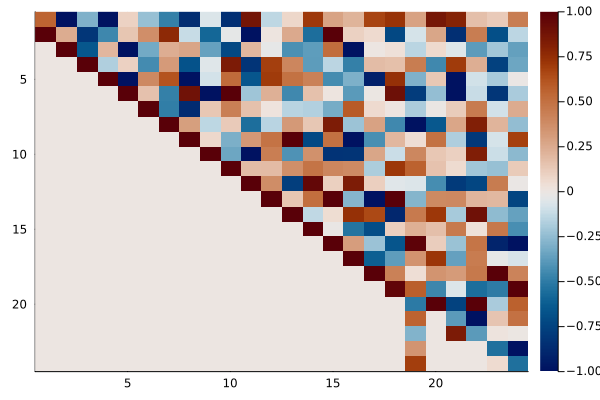

24×24 Matrix{Float64}:
  0.558838     -1.22623      -0.29788      …   0.125724    0.447763
  2.91881       0.246361     -0.818113        -0.693935   -0.146744
 -1.6506e-16    3.75799      -0.658762        -0.211853   -0.364445
  7.87543e-17  -3.77954e-17   3.18151         -0.765073   -0.342733
 -6.22706e-17  -8.14915e-17   7.26498e-17     -0.195967   -0.0128795
  2.3474e-16    9.88471e-17  -8.22936e-17  …  -0.817311   -0.191872
  7.89939e-18  -1.80621e-17   4.24782e-17     -0.091369    0.250753
  2.84686e-16   3.1009e-18   -4.7494e-18       0.213749   -0.249507
  2.04814e-16  -4.42797e-17  -1.11235e-16     -0.0834314   0.687788
 -1.31838e-16  -4.12869e-17   7.14313e-17     -0.108849   -0.266492
  1.98593e-17  -2.46024e-17  -5.7226e-17   …  -0.239269    0.12519
 -9.45864e-17  -1.50109e-16  -6.6085e-18       0.455101   -0.0123448
 -3.93213e-16  -1.79299e-17   8.76588e-17      0.198228   -0.743815
  4.44655e-16   5.13467e-17   3.76687e-18     -0.258969   -0.361563
  7.66323e-17  -2.50658e

In [11]:
Spike(A,m)